# Import and set colors

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from gprofiler import gprofiler
import os 
import seaborn as sb

In [2]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=False, fontsize=12, color_map='plasma')
sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.22.3 scipy==1.8.0 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.4


In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
pair= [ "#DA0AD3", "#ED99BD",  "#FD3F14", "#ffbf00", 
       "#66B032", "#66B032", "#9AD255", "#9AD255",
       "#b30047",   "#dada2b", "#dada2b"]

# Set project file paths

In [5]:
file_path = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/'
#this is my file path please adapt it to your directory

In [6]:
data_dir =file_path +  'data/' 

In [8]:
table_dir = file_path + 'tables/230809diffxpy/'

In [9]:
sc.settings.figdir = file_path + 'figures/'

In [10]:
import datetime

today = datetime.date.today().strftime('%y%m%d') #creates a YYMMDD string of today's date

# Read Data & downstream analysis

In [11]:
adata_all_astros=sc.read(data_dir + "230808adata_treated_astros_proc_scVI.h5ad")

In [12]:
adata_all_astros

AnnData object with n_obs × n_vars = 16025 × 15747
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet', 'size_factors', 'leiden', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'leiden13', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_all', 'S_score', 'G2M_score', 'phase', 'Cycling cells', 'cell_cycle', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DCs', 'NKT cells', 'T cells', 'B cells', 'Neutrophils', 'Neurons', 'OPCs', 'COPs', 'MOL', 'Astrocytes', 'Pericytes', 'VSMCs', 'VLMCs', 'VEC', 'annotated', 'annotated_group', 'leiden_astros_r1', 'leiden_astros_r0.5', 'leiden_astros_r0.4', 'leiden_astros_r0.6', 'clustersastros', 'reactive_

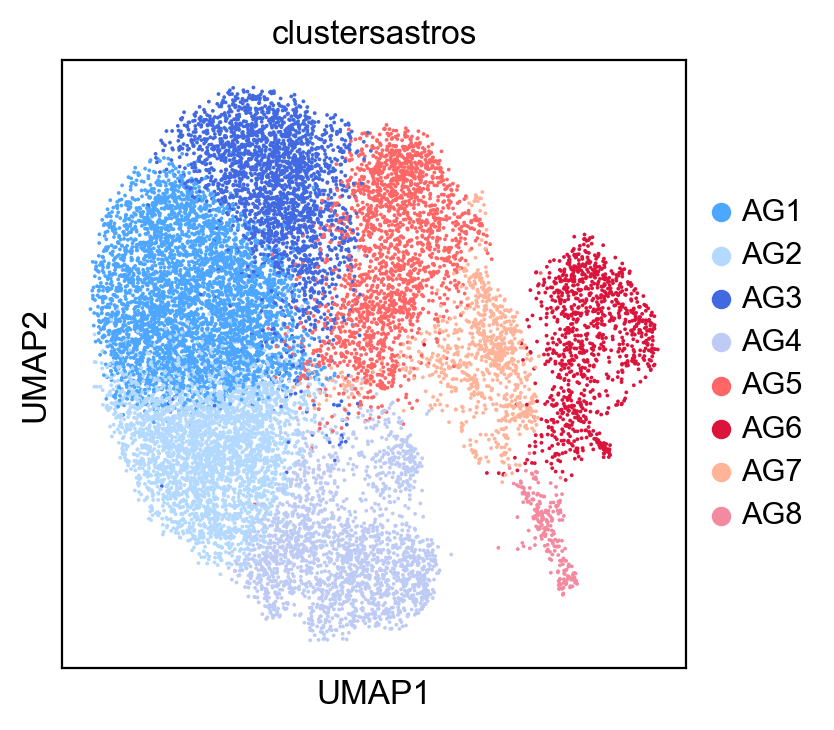

In [13]:
sc.pl.umap(adata_all_astros, color='clustersastros')

In [14]:
adata_all_astros_5dpi= adata_all_astros[np.in1d(adata_all_astros.obs['condition'], 
                           ['5dpi_CTRL','5dpi_INH'])].copy()

In [15]:
import batchglm.api as glm
import diffxpy.api as de

print("batchglm version "+glm.__version__)
print("diffpy version "+de.__version__)
from batchglm.pkg_constants import TF_CONFIG_PROTO

batchglm version v0.7.4
diffpy version v0.7.4


In [16]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

# 5dpi

In [17]:
adata_all_astros_5dpi.obs['clustersastros'].value_counts()*0.1

AG5    160.7
AG4    149.0
AG2     88.8
AG1     77.2
AG3     68.2
AG7     65.6
AG6     51.3
AG8      8.8
Name: clustersastros, dtype: float64

In [19]:
adata_all_astros_5dpi_AG1= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG1'])].copy()

In [20]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG1, min_cells=77)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG1.n_vars))

Total number of genes: 15747
filtered out 9990 genes that are detected in less than 77 cells
Number of genes after cell filter: 5757


In [21]:
adata_all_astros_5dpi_AG2= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG2'])].copy()

In [22]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG2, min_cells=89)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG2.n_vars))

Total number of genes: 15747
filtered out 10537 genes that are detected in less than 89 cells
Number of genes after cell filter: 5210


In [23]:
adata_all_astros_5dpi_AG3= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG3'])].copy()

In [24]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG3, min_cells=68)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG3.n_vars))

Total number of genes: 15747
filtered out 9698 genes that are detected in less than 68 cells
Number of genes after cell filter: 6049


In [25]:
adata_all_astros_5dpi_AG4= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG4'])].copy()

In [26]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG4, min_cells=149)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG4.n_vars))

Total number of genes: 15747
filtered out 10481 genes that are detected in less than 149 cells
Number of genes after cell filter: 5266


In [27]:
adata_all_astros_5dpi_AG5= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG5'])].copy()

In [28]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG5.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG5, min_cells=161)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG5.n_vars))

Total number of genes: 15747
filtered out 7472 genes that are detected in less than 161 cells
Number of genes after cell filter: 8275


In [29]:
adata_all_astros_5dpi_AG6= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG6'])].copy()

In [30]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG6.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG6, min_cells=51)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG6.n_vars))

Total number of genes: 15747
filtered out 11148 genes that are detected in less than 51 cells
Number of genes after cell filter: 4599


In [31]:
adata_all_astros_5dpi_AG7= adata_all_astros_5dpi[np.in1d(adata_all_astros_5dpi.obs['clustersastros'], 
                           ['AG7'])].copy()

In [32]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_5dpi_AG7.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_astros_5dpi_AG7, min_cells=66)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_5dpi_AG7.n_vars))

Total number of genes: 15747
filtered out 4954 genes that are detected in less than 66 cells
Number of genes after cell filter: 10793


# Cluster AG1

In [33]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG1= de.test.wald(
    data=adata_all_astros_5dpi_AG1.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG1.var_names,
    sample_description=adata_all_astros_5dpi_AG1.obs
)

training location model: False
training scale model: True
iter   0: ll=19250460.602145
iter   1: ll=19250460.602145, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3545081.228843, converged: 0.54% (loc: 0.54%, scale update: True), in 14.86sec
iter   3: ll=3545081.228843, converged: 0.54% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3459565.878087, converged: 94.55% (loc: 94.55%, scale update: True), in 13.63sec
iter   5: ll=3459565.878087, converged: 94.55% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3448600.335143, converged: 98.77% (loc: 98.77%, scale update: True), in 6.27sec
iter   7: ll=3448600.335143, converged: 98.77% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3446974.879287, converged: 99.81% (loc: 99.81%, scale update: True), in 5.94sec
iter   9: ll=3446974.879287, converged: 99.81% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=3446167.339711, converged: 99.98% (loc: 99.98%, scale 

Order test results by q-value:

In [34]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG1.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1824,Hopx,1.102896e-12,6.349370e-09,-0.586221,1.887306,False,6.113368e-09,-0.586221,0.082369,-1410.051019
389,Mrpl41,3.319333e-09,9.554699e-06,-0.593616,0.731865,False,7.120336e-10,-0.593616,0.100358,-889.972866
5580,Malat1,3.077394e-08,3.085815e-05,0.207759,796.696891,False,6.507595e-09,0.207759,0.037522,-5635.795056
3300,Fam107a,3.294554e-08,3.085815e-05,-0.379109,2.930052,False,3.034327e-10,-0.379109,0.068617,-1677.444331
394,Tubb4b,3.252726e-08,3.085815e-05,-0.487782,0.967617,False,2.723324e-09,-0.487782,0.088250,-1025.792524
1424,Jun,3.752077e-08,3.085815e-05,0.825049,0.775907,False,1.039158e-08,0.825049,0.149951,-904.311646
2536,Mfge8,2.887786e-08,3.085815e-05,0.232766,15.027202,False,5.965236e-11,0.232766,0.041954,-2647.554676
699,Cst3,6.562277e-08,4.722379e-05,-0.236044,168.579016,False,1.087477e-07,-0.236044,0.043690,-4528.409695
3110,Msmo1,1.029792e-07,5.389557e-05,-0.247127,7.770725,False,1.238583e-08,-0.247127,0.046440,-2222.185189
3420,Gjb6,1.007637e-07,5.389557e-05,-0.267847,5.015544,False,3.750840e-10,-0.267847,0.050297,-1941.627057


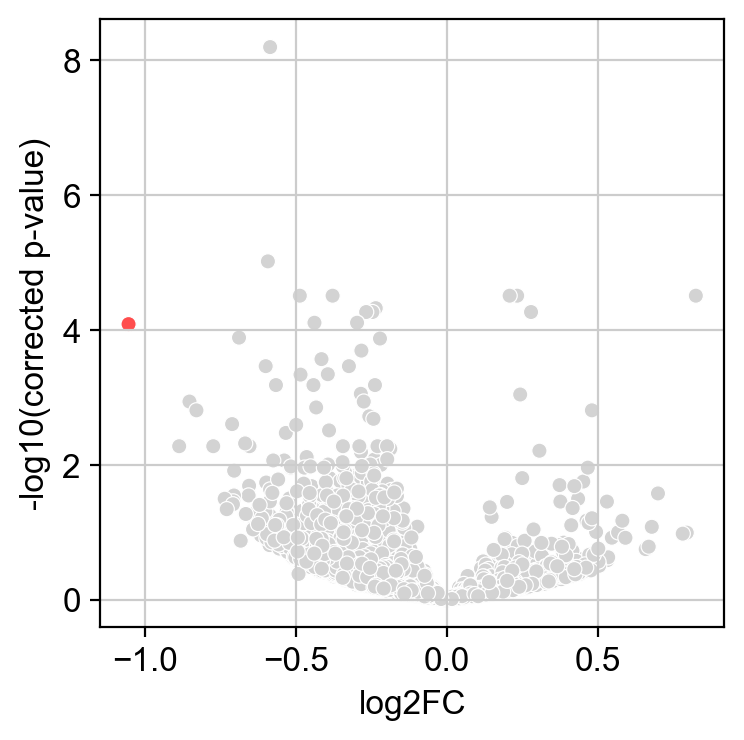

In [35]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG1.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [36]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG1.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG1.csv')

In [37]:
today

'230809'

In [45]:
difxpy_5dpi_INHvsCTRL_AG1 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG1.csv', index_col=0)

In [46]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG1=difxpy_5dpi_INHvsCTRL_AG1.loc[difxpy_5dpi_INHvsCTRL_AG1['mean']>0.2]

In [47]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG1 = difxpy_5dpi_INHvsCTRL_expressed_AG1.loc[difxpy_5dpi_INHvsCTRL_expressed_AG1['pval']<0.05]

In [48]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG1 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG1.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG1['log2fc']>0.7]
Astros_5dpi_CTRL_AG1 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG1.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG1['log2fc']<-0.7]

In [49]:
Astros_5dpi_INH_AG1.shape

(1, 10)

In [50]:
Astros_5dpi_CTRL_AG1.shape

(2, 10)

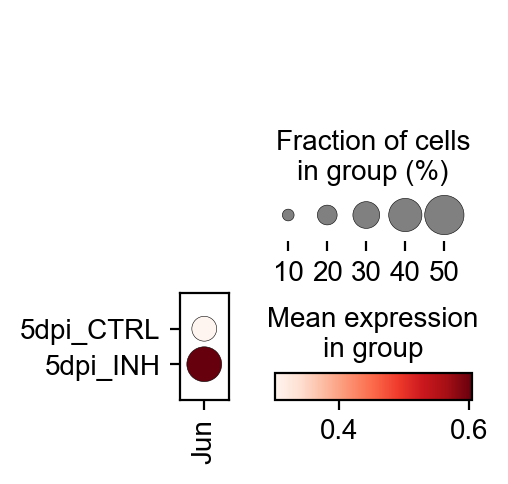

In [51]:
sc.pl.dotplot(adata_all_astros_5dpi_AG1,Astros_5dpi_INH_AG1['gene'].head(30) , groupby='condition')

# Cluster AG2

In [52]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG2= de.test.wald(
    data=adata_all_astros_5dpi_AG2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG2.var_names,
    sample_description=adata_all_astros_5dpi_AG2.obs
)

training location model: False
training scale model: True
iter   0: ll=13193257.365388
iter   1: ll=13193257.365388, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3417776.442788, converged: 0.42% (loc: 0.42%, scale update: True), in 12.59sec
iter   3: ll=3417776.442788, converged: 0.42% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3350967.058068, converged: 96.37% (loc: 96.37%, scale update: True), in 12.23sec
iter   5: ll=3350967.058068, converged: 96.37% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3344201.687781, converged: 99.21% (loc: 99.21%, scale update: True), in 5.94sec
iter   7: ll=3344201.687781, converged: 99.21% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3342147.553559, converged: 99.85% (loc: 99.85%, scale update: True), in 5.59sec
iter   9: ll=3342147.553559, converged: 99.85% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=3342093.188293, converged: 99.98% (loc: 99.98%, scale 

Order test results by q-value:

In [53]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG2.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
895,Tmsb4x,1.353584e-11,5.962012e-08,-0.422918,2.563063,False,3.745303e-10,-0.422918,0.062536,-1804.311594
3453,Cck,2.288680e-11,5.962012e-08,-0.559063,1.058559,False,6.197787e-09,-0.559063,0.083613,-1236.559884
1648,Hopx,1.758217e-09,3.053437e-06,-0.555805,0.986486,False,1.071734e-10,-0.555805,0.092346,-1203.659237
4878,Calm2,1.335526e-08,1.739522e-05,-0.346448,1.954955,False,5.286287e-09,-0.346448,0.060979,-1591.474319
1930,Hnrnpa2b1,3.079309e-08,2.934369e-05,-0.384687,2.907658,False,2.969858e-10,-0.384687,0.069477,-1938.263209
2745,Rpl41,3.379311e-08,2.934369e-05,-0.316340,2.942568,False,4.934403e-09,-0.316340,0.057302,-1881.507026
3351,Snx14,1.665202e-07,1.239386e-04,-0.719151,0.282658,False,2.280870e-09,-0.719151,0.137419,-587.086107
2625,Bsg,2.154462e-07,1.403093e-04,-0.318584,2.395270,False,8.365268e-09,-0.318584,0.061438,-1751.274557
627,Snap25,3.033388e-07,1.580395e-04,-0.449352,0.951577,False,6.494205e-09,-0.449352,0.087741,-1180.635394
4635,Pcp4,2.802662e-07,1.580395e-04,-0.558914,0.559685,False,6.399863e-11,-0.558914,0.108817,-890.470517


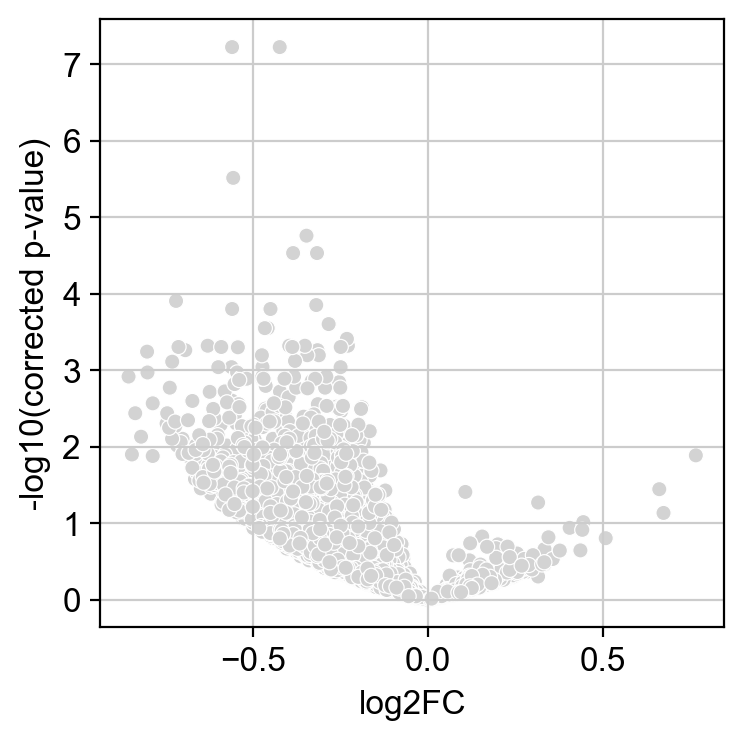

In [54]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [55]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG2.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG2.csv')

In [56]:
today

'230809'

In [57]:
difxpy_5dpi_INHvsCTRL_AG2 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG2.csv', index_col=0)

In [58]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG2=difxpy_5dpi_INHvsCTRL_AG2.loc[difxpy_5dpi_INHvsCTRL_AG2['mean']>0.2]

In [59]:
difxpy_5dpi_INHvsCTRL_expressed_AG2

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.027636,0.115905,-0.315820,0.235360,False,5.881994e-02,-0.315820,0.143397,-197.149532
2,Tcea1,0.010777,0.066899,-0.401811,0.257883,False,1.205250e-09,-0.401811,0.157582,-563.083989
3,Rgs20,0.529766,0.686781,0.066400,0.640766,False,3.847847e-09,0.066400,0.105672,-967.036893
4,Atp6v1h,0.064063,0.191053,-0.259044,0.307432,False,1.833732e-09,-0.259044,0.139892,-630.804681
5,Rb1cc1,0.000643,0.013894,-0.429933,0.435811,False,1.629240e-09,-0.429933,0.125972,-776.929262
...,...,...,...,...,...,...,...,...,...,...
5205,mt-Nd4,0.000183,0.007052,-0.216423,17.275901,False,1.284651e-09,-0.216423,0.057849,-3379.674626
5206,mt-Nd5,0.003089,0.033807,-0.305827,2.577703,False,5.325611e-10,-0.305827,0.103363,-1848.310810
5207,mt-Nd6,0.824497,0.897440,-0.054697,0.225225,False,1.391443e-08,-0.054697,0.246646,-474.486168
5208,mt-Cytb,0.004842,0.042257,-0.149240,29.688063,False,6.259479e-09,-0.149240,0.052972,-3813.869365


In [60]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG2 = difxpy_5dpi_INHvsCTRL_expressed_AG2.loc[difxpy_5dpi_INHvsCTRL_expressed_AG2['pval']<0.05]

In [61]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG2 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG2['log2fc']>0.7]
Astros_5dpi_CTRL_AG2 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG2['log2fc']<-0.7]

In [62]:
Astros_5dpi_INH_AG2.shape

(1, 10)

In [63]:
Astros_5dpi_CTRL_AG2.shape

(5, 10)

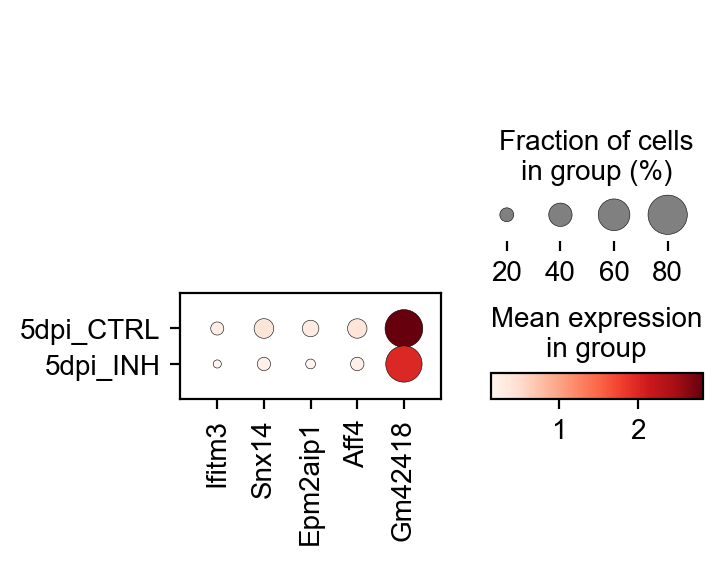

In [64]:
sc.pl.dotplot(adata_all_astros_5dpi_AG2,Astros_5dpi_CTRL_AG2['gene'].head(30) , groupby='condition',)

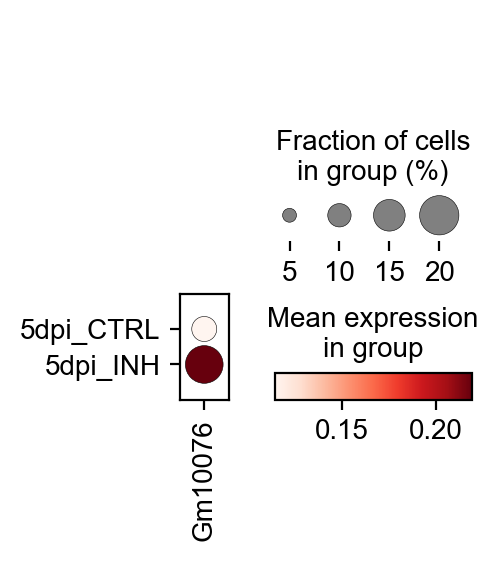

In [65]:
sc.pl.dotplot(adata_all_astros_5dpi_AG2,Astros_5dpi_INH_AG2['gene'].head(30) , groupby='condition',)

# Cluster AG3

In [66]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3= de.test.wald(
    data=adata_all_astros_5dpi_AG3.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG3.var_names,
    sample_description=adata_all_astros_5dpi_AG3.obs
)

training location model: False
training scale model: True
iter   0: ll=16043173.855152
iter   1: ll=16043173.855152, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3251806.961267, converged: 0.53% (loc: 0.53%, scale update: True), in 12.18sec
iter   3: ll=3251806.961267, converged: 0.53% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3174823.510149, converged: 94.99% (loc: 94.99%, scale update: True), in 11.57sec
iter   5: ll=3174823.510149, converged: 94.99% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3166081.268998, converged: 98.99% (loc: 98.99%, scale update: True), in 5.87sec
iter   7: ll=3166081.268998, converged: 98.99% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3165281.010747, converged: 99.85% (loc: 99.85%, scale update: True), in 5.56sec
iter   9: ll=3165281.010747, converged: 99.85% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=3165074.688843, converged: 99.93% (loc: 99.93%, scale 

Order test results by q-value:

In [67]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5654,Nrxn1,0.000000e+00,0.000000e+00,-0.598002,5.614370,False,6.334551e-08,-0.598002,0.069629,-1865.075926
3716,Nrgn,0.000000e+00,0.000000e+00,-0.953368,1.029326,False,2.905806e-09,-0.953368,0.105164,-920.015314
6034,mt-Nd2,2.220446e-16,4.477159e-13,-0.586479,19.916422,False,1.615471e-09,-0.586479,0.071227,-2698.636624
6036,mt-Co2,1.110223e-15,1.678935e-12,-0.522254,38.680352,False,3.932518e-08,-0.522254,0.065185,-3129.383481
138,Acsl3,9.325873e-15,1.128244e-11,-0.445144,8.423754,False,8.989854e-10,-0.445144,0.057457,-2076.305121
6042,mt-Nd4,1.754152e-13,1.768478e-10,-0.431881,27.938416,False,4.628329e-09,-0.431881,0.058630,-2881.901194
3982,Cck,5.844214e-13,5.050236e-10,-0.630573,1.243402,False,6.100347e-09,-0.630573,0.087530,-1019.343718
4319,Spag9,7.678302e-13,5.160672e-10,-0.543336,2.074780,False,3.128722e-08,-0.543336,0.075813,-1280.753486
1920,Slc4a4,7.454037e-13,5.160672e-10,-0.560910,3.961877,False,9.970661e-10,-0.560910,0.078221,-1670.996943
5546,AY036118,1.597167e-12,9.661262e-10,-1.082089,4.954545,False,7.610283e-10,-1.082089,0.153145,-1596.582607


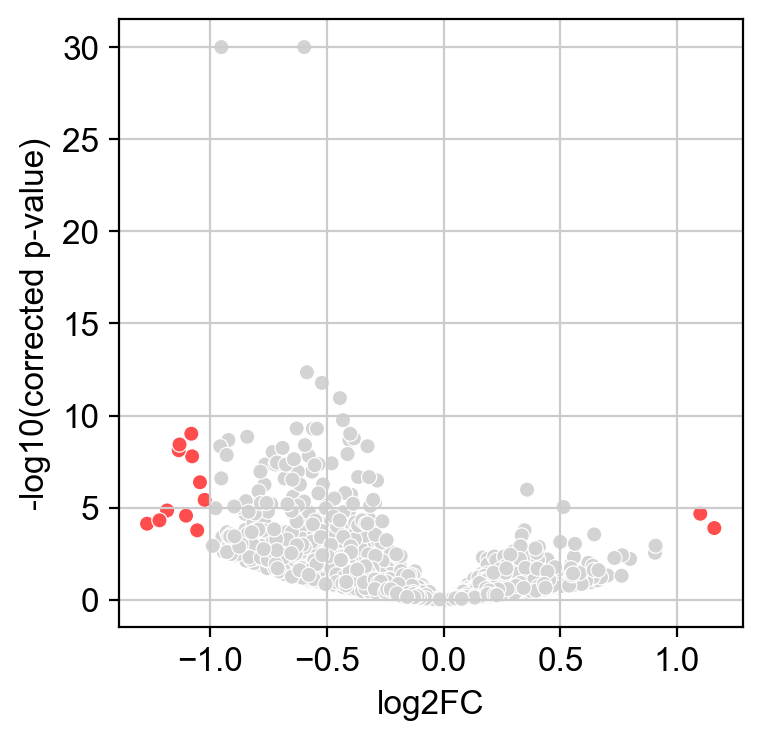

In [68]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [69]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.csv')

In [70]:
today

'230809'

In [71]:
difxpy_5dpi_INHvsCTRL_AG3 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.csv', index_col=0)

In [72]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG3=difxpy_5dpi_INHvsCTRL_AG3.loc[difxpy_5dpi_INHvsCTRL_AG3['mean']>0.2]

In [73]:
difxpy_5dpi_INHvsCTRL_expressed_AG3

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,9.029685e-01,9.531708e-01,0.019162,0.318182,False,4.875031e-11,0.019162,0.157179,-496.330628
2,Tcea1,3.072583e-02,1.265961e-01,-0.290993,0.410557,False,2.542171e-09,-0.290993,0.134681,-576.151548
3,Rgs20,8.500654e-03,5.173084e-02,-0.253840,0.992669,False,1.325834e-08,-0.253840,0.096462,-930.137032
4,Atp6v1h,4.957572e-01,6.974035e-01,-0.096517,0.353372,False,2.560758e-09,-0.096517,0.141691,-526.699026
5,Rb1cc1,4.885177e-04,6.793204e-03,-0.449842,0.501466,False,3.258913e-11,-0.449842,0.129006,-646.008879
...,...,...,...,...,...,...,...,...,...,...
6042,mt-Nd4,1.754152e-13,1.768478e-10,-0.431881,27.938416,False,4.628329e-09,-0.431881,0.058630,-2881.901194
6043,mt-Nd5,1.085221e-10,2.344465e-08,-0.642282,4.473607,False,3.328040e-08,-0.642282,0.099508,-1737.238343
6044,mt-Nd6,1.484160e-04,2.962932e-03,-0.653244,0.472141,False,7.719604e-09,-0.653244,0.172191,-602.222512
6045,mt-Cytb,1.486948e-09,2.193792e-07,-0.320147,47.724340,False,4.611963e-08,-0.320147,0.052954,-3208.791771


In [74]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG3 = difxpy_5dpi_INHvsCTRL_expressed_AG3.loc[difxpy_5dpi_INHvsCTRL_expressed_AG3['pval']<0.05]

In [75]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG3 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG3.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG3['log2fc']>0.7]
Astros_5dpi_CTRL_AG3 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG3.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG3['log2fc']<-0.7]

In [76]:
Astros_5dpi_INH_AG3.shape

(7, 10)

In [77]:
Astros_5dpi_CTRL_AG3.shape

(56, 10)

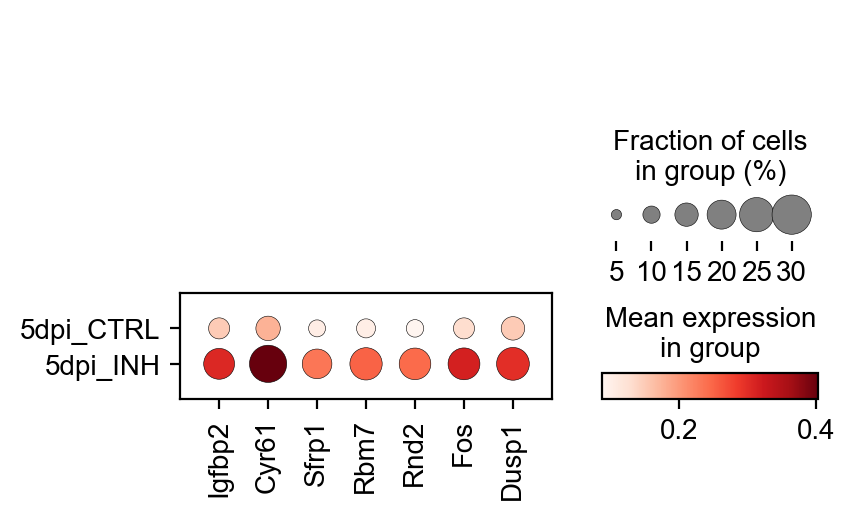

In [78]:
sc.pl.dotplot(adata_all_astros_5dpi_AG3,Astros_5dpi_INH_AG3['gene'].head(30) , groupby='condition',)

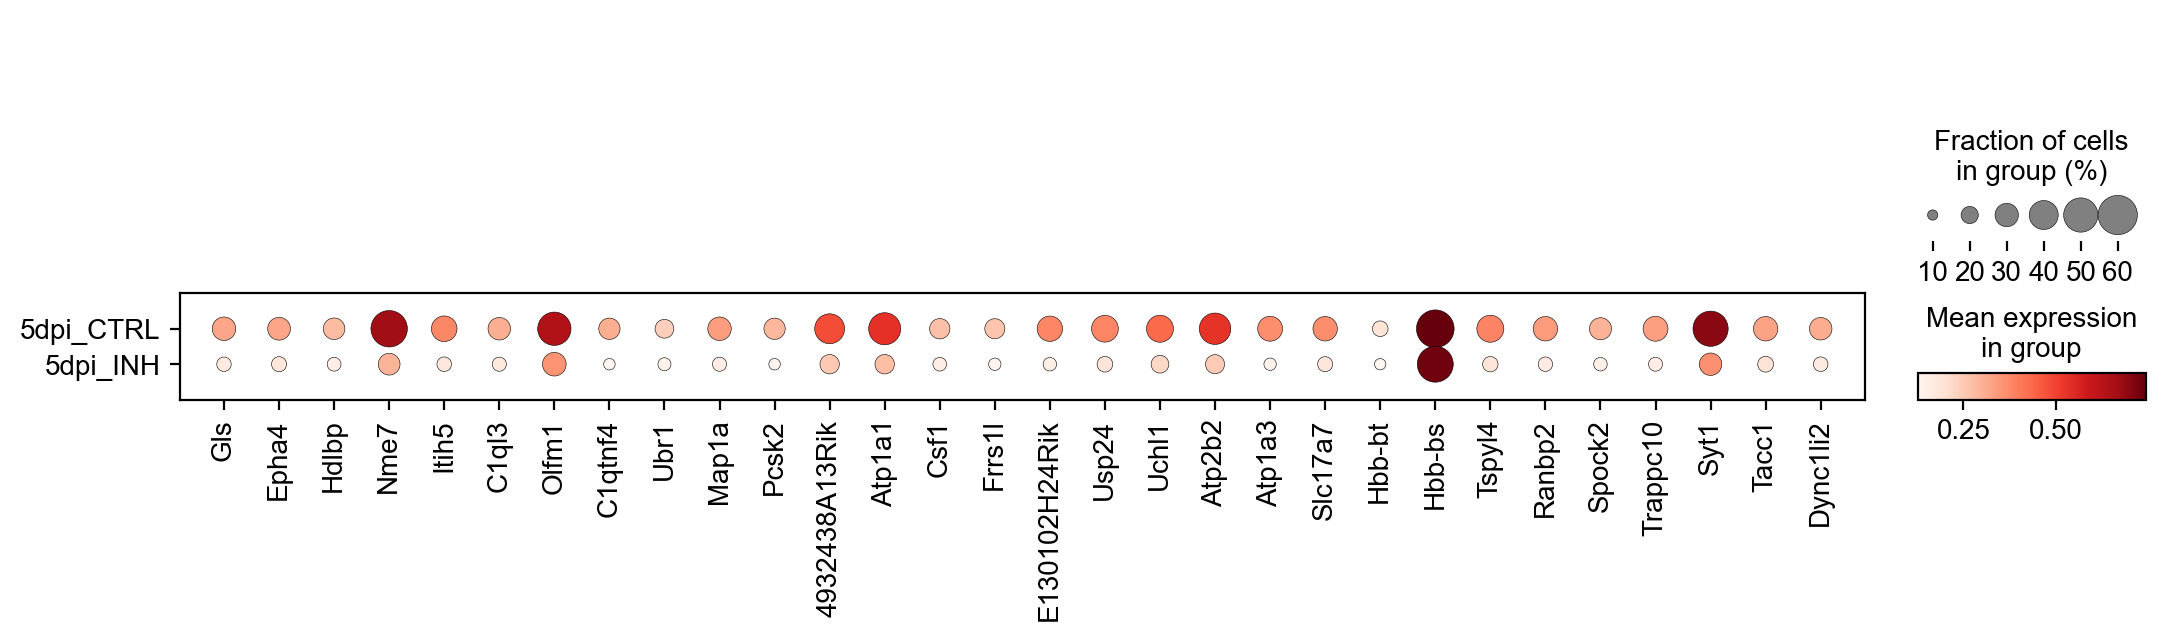

In [79]:
sc.pl.dotplot(adata_all_astros_5dpi_AG3,Astros_5dpi_CTRL_AG3['gene'].head(30) , groupby='condition',)

# Cluster AG4

In [80]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG4= de.test.wald(
    data=adata_all_astros_5dpi_AG4.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG4.var_names,
    sample_description=adata_all_astros_5dpi_AG4.obs
)

training location model: False
training scale model: True
iter   0: ll=9268187.262976
iter   1: ll=9268187.262976, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=5618029.024551, converged: 0.30% (loc: 0.30%, scale update: True), in 14.47sec
iter   3: ll=5618029.024551, converged: 0.30% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=5593210.882550, converged: 98.73% (loc: 98.73%, scale update: True), in 15.31sec
iter   5: ll=5593210.882550, converged: 98.73% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=5590580.678744, converged: 99.79% (loc: 99.79%, scale update: True), in 7.40sec
iter   7: ll=5590580.678744, converged: 99.79% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=5589755.965173, converged: 99.96% (loc: 99.96%, scale update: True), in 6.72sec
iter   9: ll=5589755.965173, converged: 99.96% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=5589755.965173, converged: 100.00% (loc: 100.00%, scale 

Order test results by q-value:

In [81]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5654,Nrxn1,0.000000e+00,0.000000e+00,-0.598002,5.614370,False,6.334551e-08,-0.598002,0.069629,-1865.075926
3716,Nrgn,0.000000e+00,0.000000e+00,-0.953368,1.029326,False,2.905806e-09,-0.953368,0.105164,-920.015314
6034,mt-Nd2,2.220446e-16,4.477159e-13,-0.586479,19.916422,False,1.615471e-09,-0.586479,0.071227,-2698.636624
6036,mt-Co2,1.110223e-15,1.678935e-12,-0.522254,38.680352,False,3.932518e-08,-0.522254,0.065185,-3129.383481
138,Acsl3,9.325873e-15,1.128244e-11,-0.445144,8.423754,False,8.989854e-10,-0.445144,0.057457,-2076.305121
6042,mt-Nd4,1.754152e-13,1.768478e-10,-0.431881,27.938416,False,4.628329e-09,-0.431881,0.058630,-2881.901194
3982,Cck,5.844214e-13,5.050236e-10,-0.630573,1.243402,False,6.100347e-09,-0.630573,0.087530,-1019.343718
4319,Spag9,7.678302e-13,5.160672e-10,-0.543336,2.074780,False,3.128722e-08,-0.543336,0.075813,-1280.753486
1920,Slc4a4,7.454037e-13,5.160672e-10,-0.560910,3.961877,False,9.970661e-10,-0.560910,0.078221,-1670.996943
5546,AY036118,1.597167e-12,9.661262e-10,-1.082089,4.954545,False,7.610283e-10,-1.082089,0.153145,-1596.582607


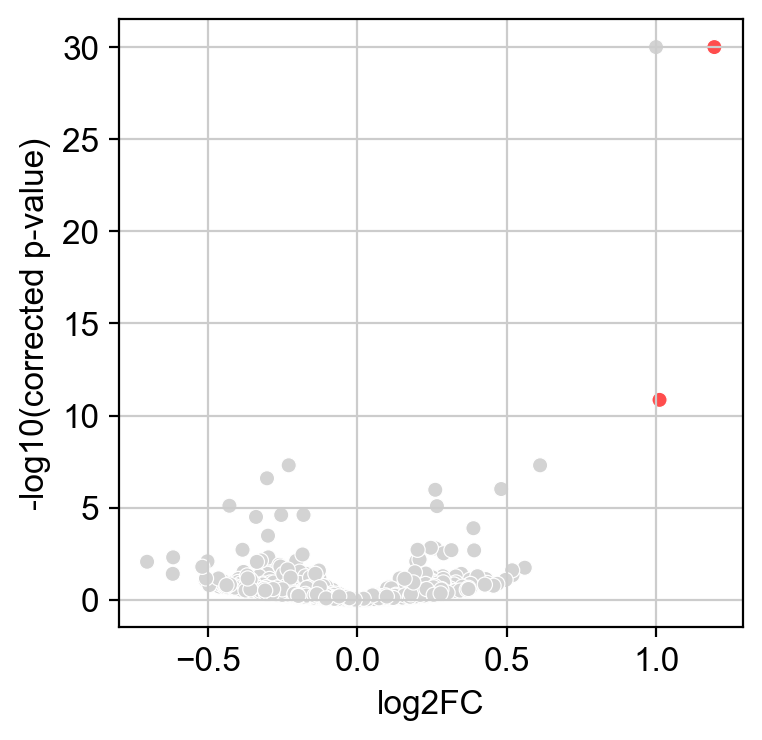

In [82]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG4.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [83]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG4.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG4.csv')

In [84]:
difxpy_5dpi_INHvsCTRL_AG4 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG4.csv', index_col=0)

In [85]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG4=difxpy_5dpi_INHvsCTRL_AG4.loc[difxpy_5dpi_INHvsCTRL_AG4['mean']>0.2]

In [86]:
difxpy_5dpi_INHvsCTRL_expressed_AG4

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1,Tcea1,0.670918,0.925776,-0.043126,0.326846,False,4.218491e-10,-0.043126,0.101498,-1102.283548
2,Rgs20,0.516644,0.867277,-0.057872,0.449664,False,2.335867e-09,-0.057872,0.089236,-1334.740800
3,Atp6v1h,0.671015,0.925776,-0.048641,0.235570,False,7.397819e-10,-0.048641,0.114514,-894.704016
4,Rb1cc1,0.420817,0.812202,0.061057,0.626846,False,2.096613e-09,0.061057,0.075847,-1605.831218
6,Pcmtd1,0.573808,0.891636,0.046682,0.488591,False,3.280226e-09,0.046682,0.082997,-1395.581891
...,...,...,...,...,...,...,...,...,...,...
5261,mt-Nd4,0.313993,0.731374,-0.035978,30.655705,False,3.224349e-08,-0.035978,0.035733,-6404.772956
5262,mt-Nd5,0.860572,0.972643,-0.008222,6.881879,False,1.616177e-08,-0.008222,0.046811,-4424.587934
5263,mt-Nd6,0.229841,0.664573,0.098700,0.845638,False,2.487676e-10,0.098700,0.082198,-1891.577471
5264,mt-Cytb,0.443017,0.824237,-0.026431,50.900000,False,1.336365e-08,-0.026431,0.034456,-7120.009198


In [87]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG4 = difxpy_5dpi_INHvsCTRL_expressed_AG4.loc[difxpy_5dpi_INHvsCTRL_expressed_AG4['pval']<0.05]

In [88]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG4 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG4.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG4['log2fc']>0.7]
Astros_5dpi_CTRL_AG4 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG4.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG4['log2fc']<-0.7]

In [89]:
Astros_5dpi_INH_AG4.shape

(3, 10)

In [90]:
Astros_5dpi_CTRL_AG4.shape

(0, 10)

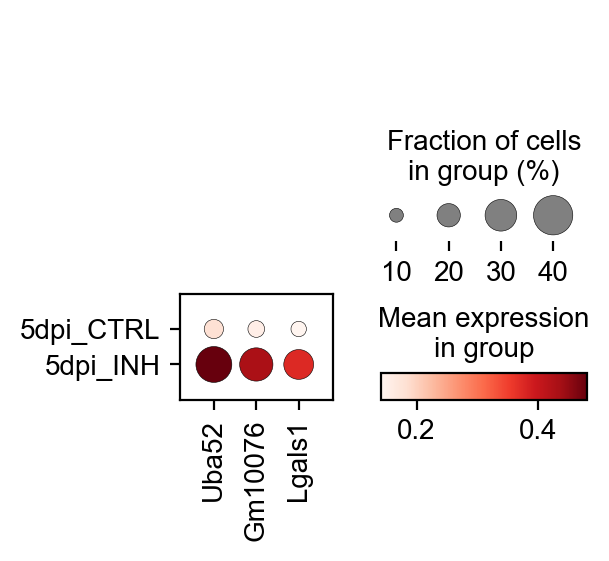

In [91]:
sc.pl.dotplot(adata_all_astros_5dpi_AG4,Astros_5dpi_INH_AG4['gene'].head(30) , groupby='condition',)

# Cluster AG5

In [92]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG5= de.test.wald(
    data=adata_all_astros_5dpi_AG5.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG5.var_names,
    sample_description=adata_all_astros_5dpi_AG5.obs
)

training location model: False
training scale model: True
iter   0: ll=21665937.942125
iter   1: ll=21665937.942125, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=13151518.194891, converged: 0.24% (loc: 0.24%, scale update: True), in 23.50sec
iter   3: ll=13151518.194891, converged: 0.24% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=13063378.917684, converged: 98.40% (loc: 98.40%, scale update: True), in 24.48sec
iter   5: ll=13063378.917684, converged: 98.40% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=13055715.880521, converged: 99.72% (loc: 99.72%, scale update: True), in 12.59sec
iter   7: ll=13055715.880521, converged: 99.72% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=13053826.264110, converged: 99.93% (loc: 99.93%, scale update: True), in 12.09sec
iter   9: ll=13053826.264110, converged: 99.93% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=13053826.264110, converged: 100.00% (loc: 10

Order test results by q-value:

In [93]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5654,Nrxn1,0.000000e+00,0.000000e+00,-0.598002,5.614370,False,6.334551e-08,-0.598002,0.069629,-1865.075926
3716,Nrgn,0.000000e+00,0.000000e+00,-0.953368,1.029326,False,2.905806e-09,-0.953368,0.105164,-920.015314
6034,mt-Nd2,2.220446e-16,4.477159e-13,-0.586479,19.916422,False,1.615471e-09,-0.586479,0.071227,-2698.636624
6036,mt-Co2,1.110223e-15,1.678935e-12,-0.522254,38.680352,False,3.932518e-08,-0.522254,0.065185,-3129.383481
138,Acsl3,9.325873e-15,1.128244e-11,-0.445144,8.423754,False,8.989854e-10,-0.445144,0.057457,-2076.305121
6042,mt-Nd4,1.754152e-13,1.768478e-10,-0.431881,27.938416,False,4.628329e-09,-0.431881,0.058630,-2881.901194
3982,Cck,5.844214e-13,5.050236e-10,-0.630573,1.243402,False,6.100347e-09,-0.630573,0.087530,-1019.343718
4319,Spag9,7.678302e-13,5.160672e-10,-0.543336,2.074780,False,3.128722e-08,-0.543336,0.075813,-1280.753486
1920,Slc4a4,7.454037e-13,5.160672e-10,-0.560910,3.961877,False,9.970661e-10,-0.560910,0.078221,-1670.996943
5546,AY036118,1.597167e-12,9.661262e-10,-1.082089,4.954545,False,7.610283e-10,-1.082089,0.153145,-1596.582607


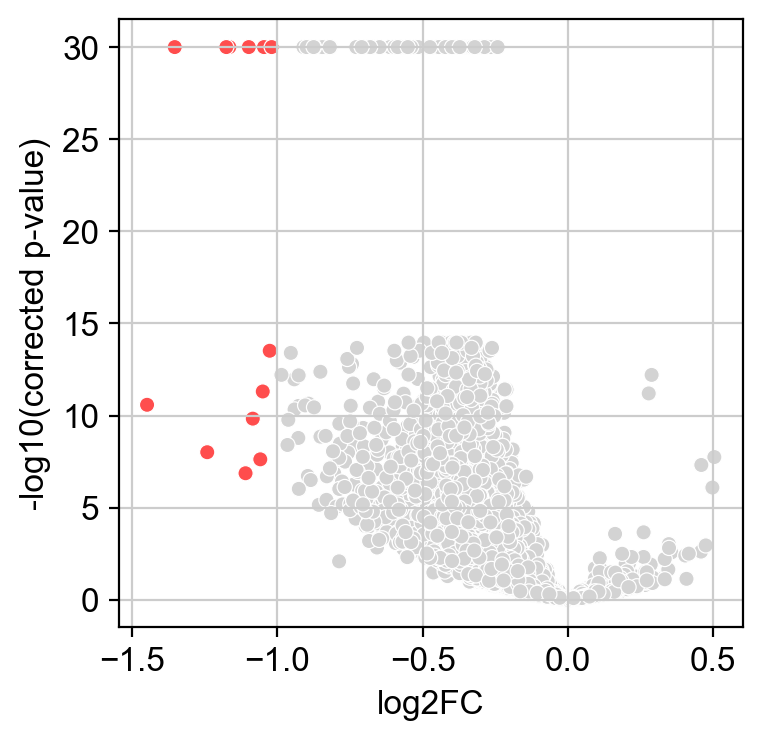

In [94]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG5.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [95]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG5.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG5.csv')

In [96]:
today

'230809'

In [97]:
difxpy_5dpi_INHvsCTRL_AG5 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG5.csv', index_col=0)

In [98]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG5=difxpy_5dpi_INHvsCTRL_AG5.loc[difxpy_5dpi_INHvsCTRL_AG5['mean']>0.2]

In [99]:
difxpy_5dpi_INHvsCTRL_expressed_AG5

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,3.185979e-02,5.253881e-02,-0.170015,0.488488,False,3.665946e-09,-0.170015,0.079218,-1496.107690
1,Lypla1,9.161765e-02,1.299959e-01,-0.147475,0.398258,False,3.774177e-10,-0.147475,0.087423,-1331.206326
2,Tcea1,8.247239e-07,5.675440e-06,-0.366369,0.840697,False,2.609788e-10,-0.366369,0.074323,-2027.103391
3,Rgs20,1.809888e-09,2.332839e-08,-0.302381,2.017424,False,5.094326e-10,-0.302381,0.050279,-3007.450817
4,Atp6v1h,9.770333e-05,3.656694e-04,-0.289674,0.555694,False,3.880047e-09,-0.289674,0.074347,-1604.003650
...,...,...,...,...,...,...,...,...,...,...
8270,mt-Nd6,5.861224e-02,8.891224e-02,-0.221352,0.971998,False,5.729450e-10,-0.221352,0.117050,-1993.804640
8271,mt-Cytb,0.000000e+00,0.000000e+00,-0.241907,164.080896,False,7.865565e-08,-0.241907,0.027177,-9257.008706
8272,Vamp7,7.565324e-04,2.134438e-03,-0.322361,0.354076,False,1.862180e-09,-0.322361,0.095706,-1243.618894
8273,PISD,5.726433e-03,1.215655e-02,-0.227292,1.018668,False,1.228236e-08,-0.227292,0.082261,-2228.032510


In [100]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG5 = difxpy_5dpi_INHvsCTRL_expressed_AG5.loc[difxpy_5dpi_INHvsCTRL_expressed_AG5['pval']<0.05]

In [101]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG5 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG5.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG5['log2fc']>0.7]
Astros_5dpi_CTRL_AG5 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG5.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG5['log2fc']<-0.7]

In [102]:
Astros_5dpi_INH_AG5.shape

(0, 10)

In [103]:
Astros_5dpi_CTRL_AG5.shape

(72, 10)

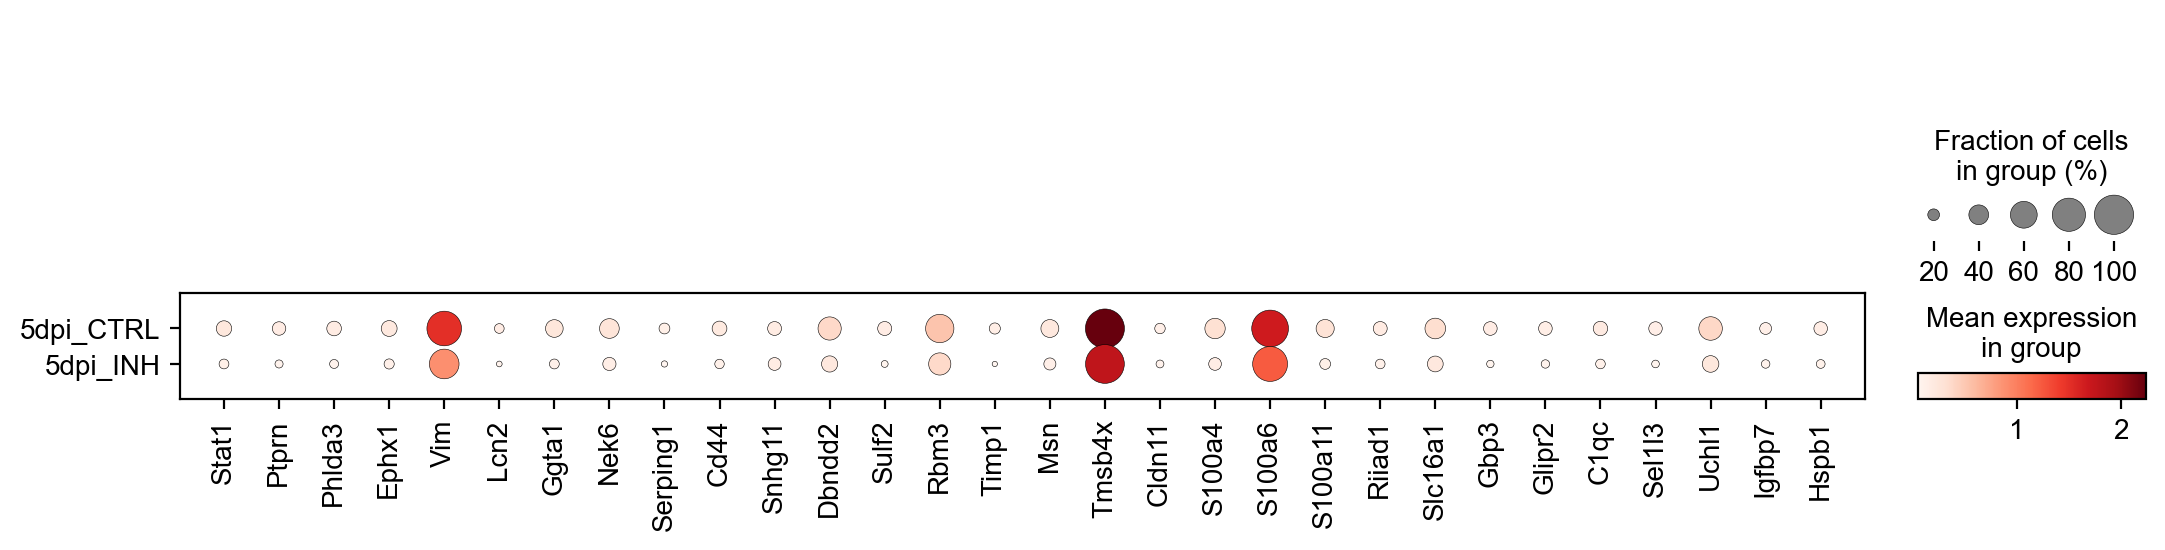

In [104]:
sc.pl.dotplot(adata_all_astros_5dpi_AG5,Astros_5dpi_CTRL_AG5['gene'].head(30) , groupby='condition',)

# Cluster AG6

In [105]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG6= de.test.wald(
    data=adata_all_astros_5dpi_AG6.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG6.var_names,
    sample_description=adata_all_astros_5dpi_AG6.obs
)

training location model: False
training scale model: True
iter   0: ll=2838839.023500
iter   1: ll=2838839.023500, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1979030.174585, converged: 0.22% (loc: 0.22%, scale update: True), in 9.63sec
iter   3: ll=1979030.174585, converged: 0.22% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1970903.620837, converged: 99.02% (loc: 99.02%, scale update: True), in 9.32sec
iter   5: ll=1970903.620837, converged: 99.02% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1969282.427296, converged: 99.70% (loc: 99.70%, scale update: True), in 5.25sec
iter   7: ll=1969282.427296, converged: 99.70% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1969220.727025, converged: 99.96% (loc: 99.96%, scale update: True), in 4.94sec
iter   9: ll=1969220.727025, converged: 99.96% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1969220.727025, converged: 100.00% (loc: 100.00%, scale up

Order test results by q-value:

In [106]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG6.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
3941,Tuba1a,0.000000e+00,0.000000e+00,-1.008814,3.333333,False,5.969363e-12,-1.008814,0.105921,-1151.769228
2784,Gm10076,0.000000e+00,0.000000e+00,1.572735,1.319688,False,1.553271e-08,1.572735,0.166590,-734.249681
2498,Uba52,1.554312e-15,2.382761e-12,1.149374,1.099415,False,5.444481e-11,1.149374,0.144163,-709.003934
3482,Tubb2a,1.532108e-14,1.761541e-11,-0.935489,1.444444,False,6.520622e-10,-0.935489,0.121731,-815.833285
2082,Hbb-bs,1.374730e-09,1.264476e-06,1.010670,2.933723,False,1.377831e-08,1.010670,0.166821,-982.390511
2594,Gm10073,1.672229e-09,1.281763e-06,1.371496,0.407407,False,3.898918e-10,1.371496,0.227566,-404.348984
3940,Tuba1b,5.463326e-09,3.589405e-06,-0.934884,1.477583,False,4.773468e-08,-0.934884,0.160291,-785.960184
1343,Vwa1,5.481592e-08,2.862612e-05,-1.188312,0.267057,False,3.317040e-09,-1.188312,0.218643,-316.004758
3213,Eif4a1,5.601980e-08,2.862612e-05,-0.706501,1.124756,False,5.274584e-09,-0.706501,0.130085,-735.883619
2525,Hmox1,1.381146e-07,6.351892e-05,-1.729597,0.483431,False,1.508897e-09,-1.729597,0.328338,-328.146650


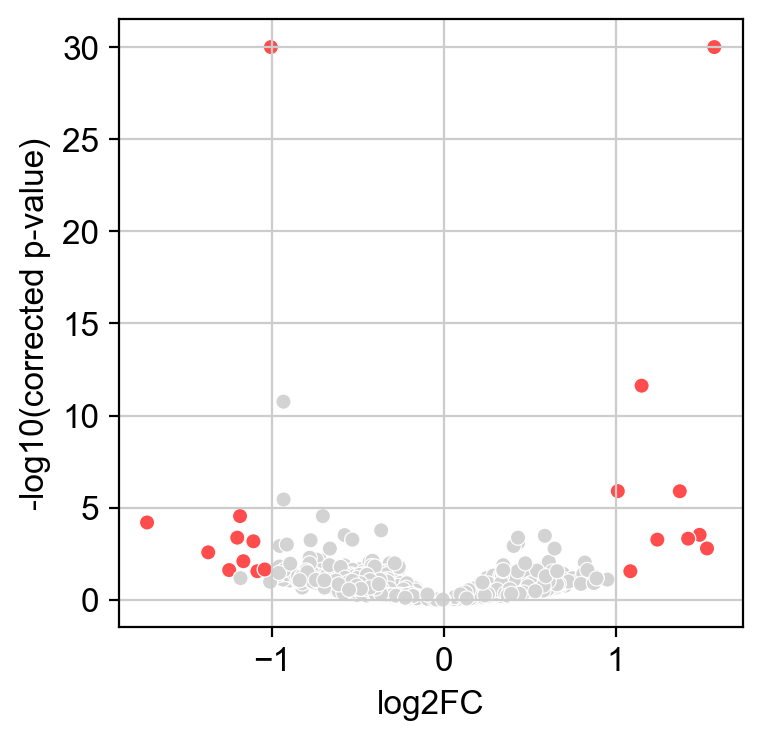

In [107]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG6.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [108]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG6.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG6.csv')

In [109]:
difxpy_5dpi_INHvsCTRL_AG6 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG6.csv', index_col=0)

In [110]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG6=difxpy_5dpi_INHvsCTRL_AG6.loc[difxpy_5dpi_INHvsCTRL_AG6['mean']>0.2]

In [111]:
difxpy_5dpi_INHvsCTRL_expressed_AG6

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.029708,0.224985,-0.422281,0.228070,False,9.873496e-11,-0.422281,0.194245,-299.260767
2,Tcea1,0.654961,0.876511,0.080512,0.360624,False,1.008885e-11,0.080512,0.180164,-403.210371
3,Rgs20,0.005076,0.087874,-0.402951,0.504873,False,2.269748e-09,-0.402951,0.143799,-487.789082
4,Atp6v1h,0.984542,0.993932,-0.003987,0.210526,False,2.558336e-10,-0.003987,0.205795,-286.483447
5,Rb1cc1,0.932656,0.978172,-0.019618,0.235867,False,9.651543e-11,-0.019618,0.232149,-304.623224
...,...,...,...,...,...,...,...,...,...,...
4592,mt-Nd4l,0.000001,0.000334,0.586274,3.793372,False,1.636808e-12,0.586274,0.119927,-1231.460287
4593,mt-Nd4,0.976052,0.992656,-0.002103,30.481481,False,3.727759e-09,-0.002103,0.070055,-2240.572237
4594,mt-Nd5,0.000370,0.024332,0.344197,5.432749,False,7.218820e-09,0.344197,0.096668,-1419.607799
4595,mt-Nd6,0.000523,0.028129,0.657546,0.598441,False,1.315909e-08,0.657546,0.189556,-519.205162


In [112]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG6 = difxpy_5dpi_INHvsCTRL_expressed_AG6.loc[difxpy_5dpi_INHvsCTRL_expressed_AG6['pval']<0.05]

In [113]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG6 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG6.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG6['log2fc']>0.7]
Astros_5dpi_CTRL_AG6 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG6.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG6['log2fc']<-0.7]

In [114]:
Astros_5dpi_INH_AG6.shape

(12, 10)

In [115]:
Astros_5dpi_CTRL_AG6.shape

(38, 10)

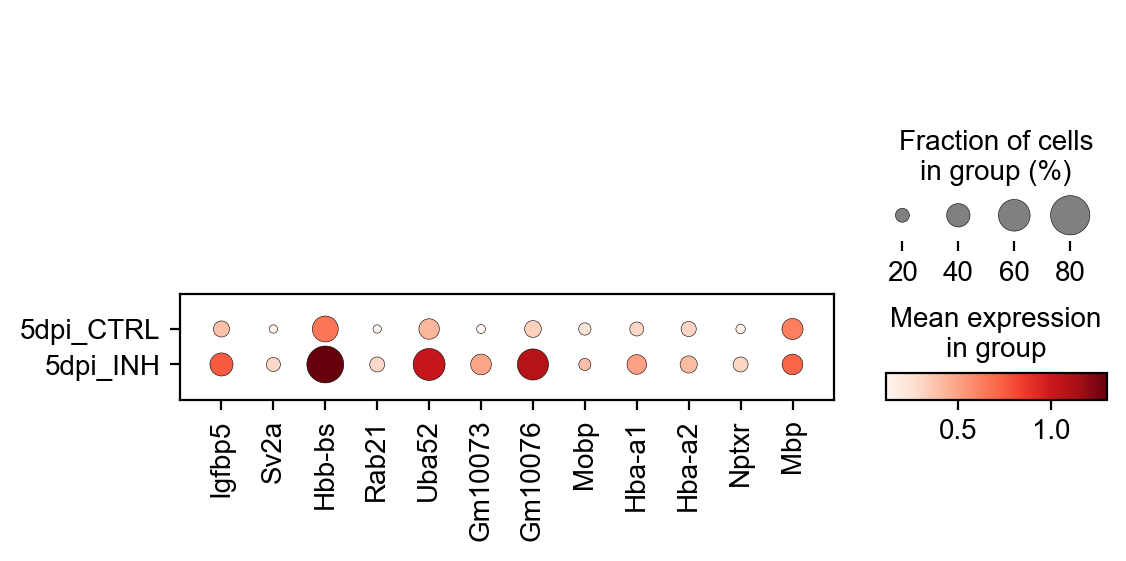

In [116]:
sc.pl.dotplot(adata_all_astros_5dpi_AG6,Astros_5dpi_INH_AG6['gene'].head(30) , groupby='condition',)

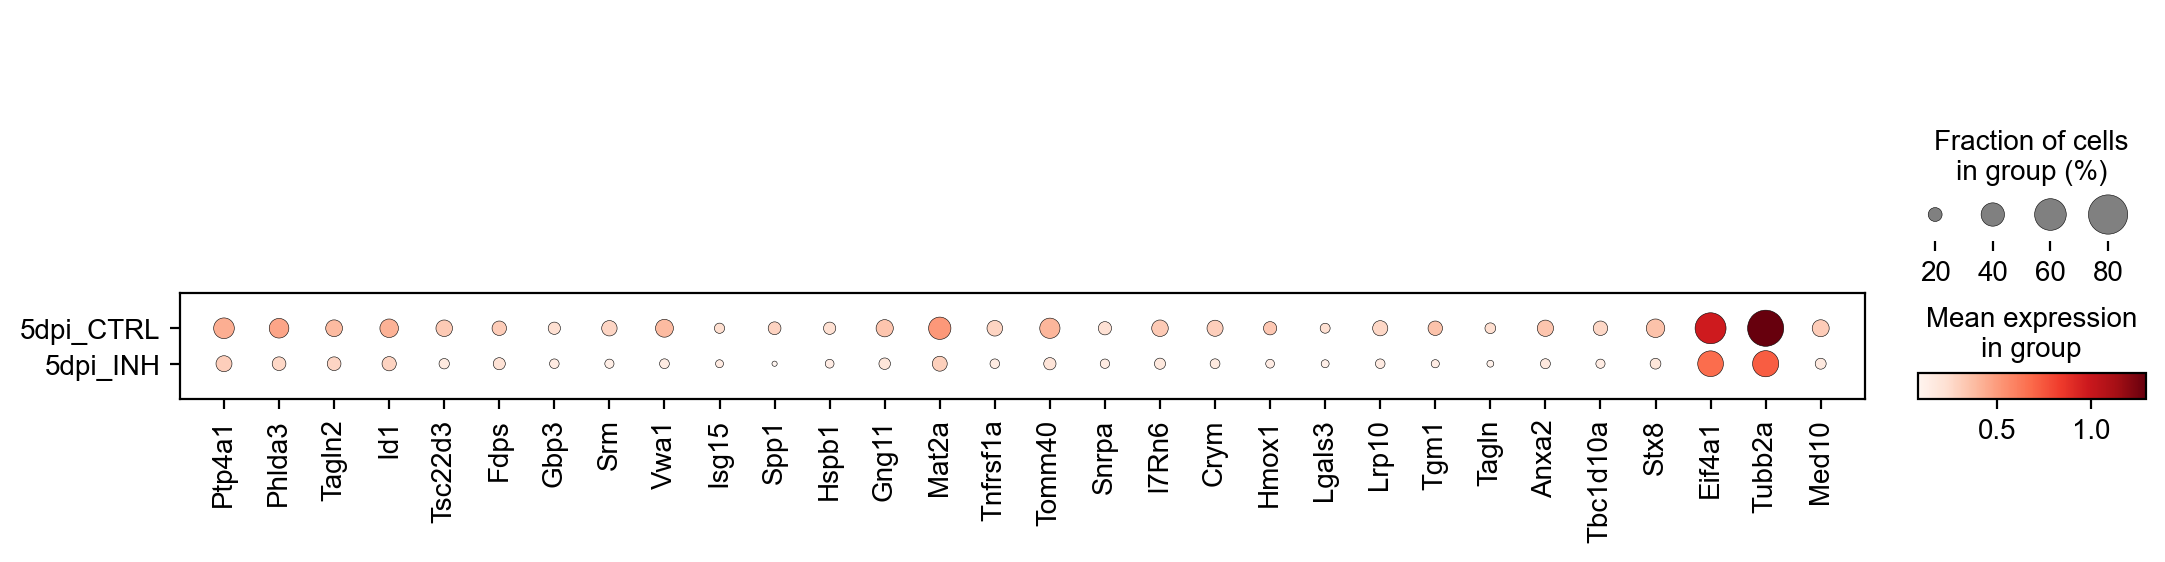

In [117]:
sc.pl.dotplot(adata_all_astros_5dpi_AG6,Astros_5dpi_CTRL_AG6['gene'].head(30) , groupby='condition',)

# Cluster AG7

In [118]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG7= de.test.wald(
    data=adata_all_astros_5dpi_AG7.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_5dpi_AG7.var_names,
    sample_description=adata_all_astros_5dpi_AG7.obs
)

training location model: False
training scale model: True
iter   0: ll=18358293.482962
iter   1: ll=18358293.482962, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=9532095.841103, converged: 0.27% (loc: 0.27%, scale update: True), in 17.20sec
iter   3: ll=9532095.841103, converged: 0.27% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=9477058.352952, converged: 98.21% (loc: 98.21%, scale update: True), in 17.07sec
iter   5: ll=9477058.352952, converged: 98.21% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=9471357.542754, converged: 99.67% (loc: 99.67%, scale update: True), in 7.35sec
iter   7: ll=9471357.542754, converged: 99.67% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=9469303.594709, converged: 99.94% (loc: 99.94%, scale update: True), in 7.17sec
iter   9: ll=9469303.594709, converged: 99.94% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=9469001.592264, converged: 99.99% (loc: 99.99%, scale 

Order test results by q-value:

In [119]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5654,Nrxn1,0.000000e+00,0.000000e+00,-0.598002,5.614370,False,6.334551e-08,-0.598002,0.069629,-1865.075926
3716,Nrgn,0.000000e+00,0.000000e+00,-0.953368,1.029326,False,2.905806e-09,-0.953368,0.105164,-920.015314
6034,mt-Nd2,2.220446e-16,4.477159e-13,-0.586479,19.916422,False,1.615471e-09,-0.586479,0.071227,-2698.636624
6036,mt-Co2,1.110223e-15,1.678935e-12,-0.522254,38.680352,False,3.932518e-08,-0.522254,0.065185,-3129.383481
138,Acsl3,9.325873e-15,1.128244e-11,-0.445144,8.423754,False,8.989854e-10,-0.445144,0.057457,-2076.305121
6042,mt-Nd4,1.754152e-13,1.768478e-10,-0.431881,27.938416,False,4.628329e-09,-0.431881,0.058630,-2881.901194
3982,Cck,5.844214e-13,5.050236e-10,-0.630573,1.243402,False,6.100347e-09,-0.630573,0.087530,-1019.343718
4319,Spag9,7.678302e-13,5.160672e-10,-0.543336,2.074780,False,3.128722e-08,-0.543336,0.075813,-1280.753486
1920,Slc4a4,7.454037e-13,5.160672e-10,-0.560910,3.961877,False,9.970661e-10,-0.560910,0.078221,-1670.996943
5546,AY036118,1.597167e-12,9.661262e-10,-1.082089,4.954545,False,7.610283e-10,-1.082089,0.153145,-1596.582607


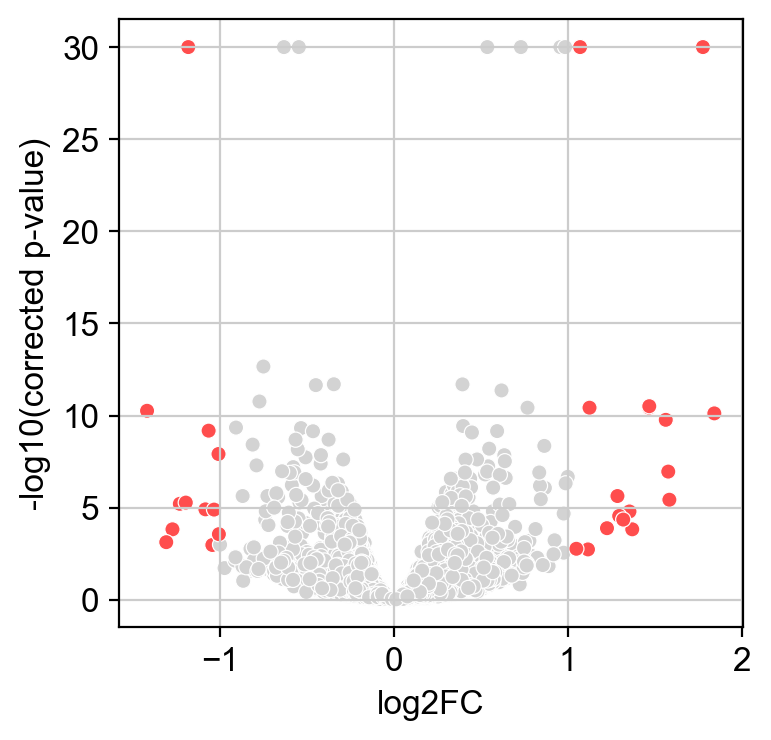

In [120]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG7.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [121]:
difxpy_reactiveastros_5dpi_INHvsCTRL_AG7.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_5dpi_INHvsCTRL_AG7.csv')

In [122]:
difxpy_5dpi_INHvsCTRL_AG7 = pd.read_csv(table_dir + '230809difxpy_reactiveastros_5dpi_INHvsCTRL_AG7.csv', index_col=0)

In [123]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_AG7=difxpy_5dpi_INHvsCTRL_AG7.loc[difxpy_5dpi_INHvsCTRL_AG7['mean']>0.2]

In [124]:
difxpy_5dpi_INHvsCTRL_expressed_AG7

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,1.686345e-01,3.896537e-01,-0.093784,2.149390,False,3.708161e-09,-0.093784,0.068127,-1239.331126
1,Lypla1,5.248835e-01,7.341023e-01,-0.052366,1.152439,False,5.024224e-09,-0.052366,0.082358,-945.266607
2,Tcea1,2.240964e-05,7.263280e-04,0.295644,2.547256,False,1.553528e-08,0.295644,0.069737,-1340.519920
3,Rgs20,8.031002e-01,9.074981e-01,-0.014244,4.347561,False,4.835067e-10,-0.014244,0.057127,-1605.246137
4,Atp6v1h,2.840759e-01,5.248591e-01,0.079632,1.580793,False,5.295504e-09,0.079632,0.074338,-1087.865025
...,...,...,...,...,...,...,...,...,...,...
10788,mt-Nd6,6.025411e-10,1.227024e-07,0.835077,1.429878,False,5.580741e-09,0.835077,0.134913,-1017.036328
10789,mt-Cytb,1.643963e-02,8.907276e-02,0.113897,215.513720,False,2.650821e-07,0.113897,0.047477,-4040.763334
10790,Vamp7,8.668844e-01,9.394994e-01,0.013337,1.227134,False,6.821967e-09,0.013337,0.079567,-971.973824
10791,PISD,7.306175e-04,1.007095e-02,0.349719,1.670732,False,2.250609e-11,0.349719,0.103534,-1151.371030


In [125]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_AG7 = difxpy_5dpi_INHvsCTRL_expressed_AG7.loc[difxpy_5dpi_INHvsCTRL_expressed_AG7['pval']<0.05]

In [126]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
Astros_5dpi_INH_AG7 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG7.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG7['log2fc']>0.7]
Astros_5dpi_CTRL_AG7 = difxpy_5dpi_INHvsCTRL_expressed_signif_AG7.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_AG7['log2fc']<-0.7]

In [127]:
Astros_5dpi_INH_AG7.shape

(35, 10)

In [128]:
Astros_5dpi_CTRL_AG7.shape

(34, 10)

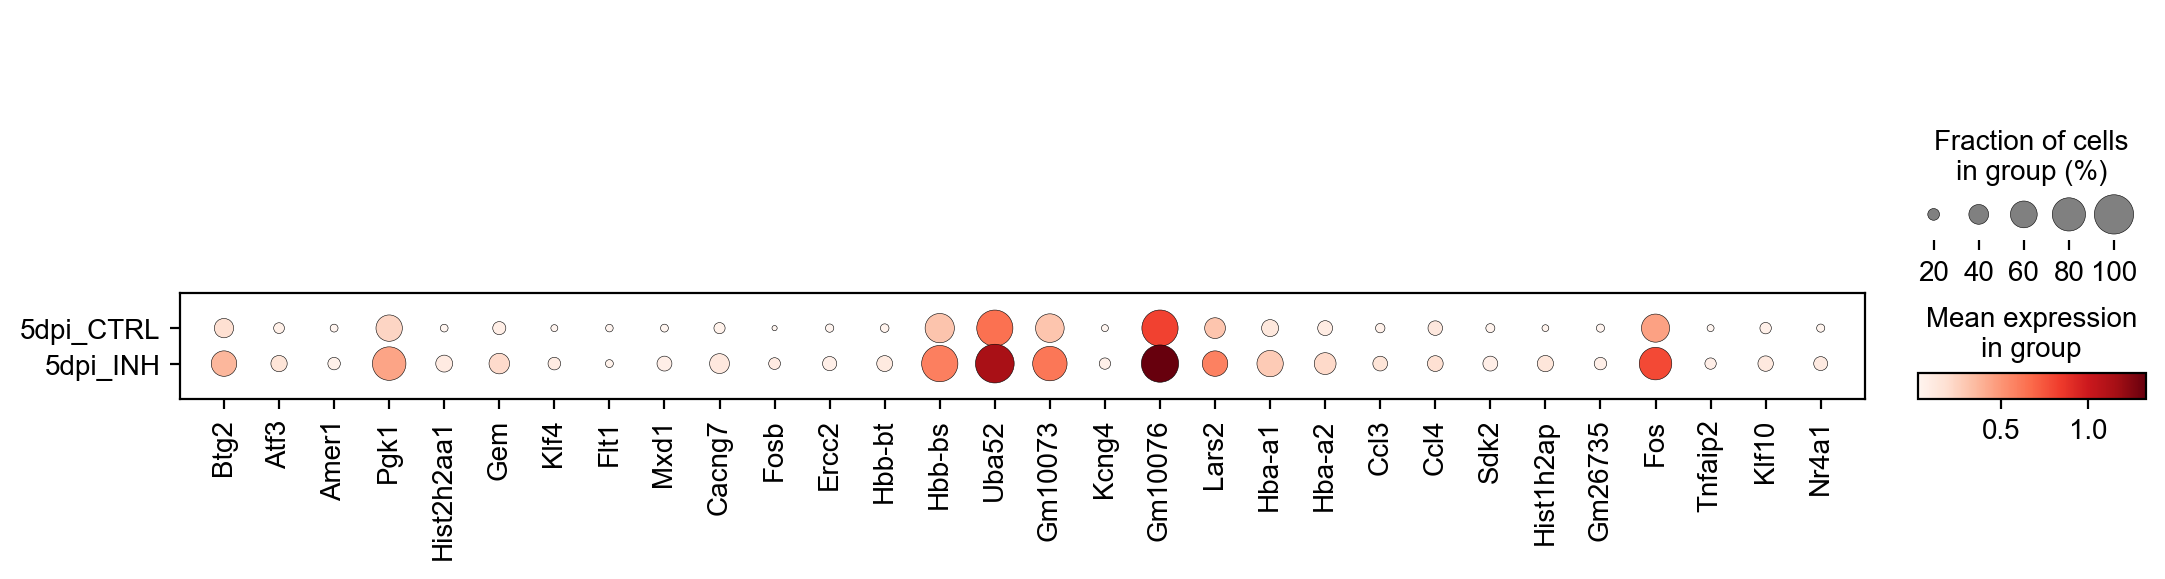

In [129]:
sc.pl.dotplot(adata_all_astros_5dpi_AG7,Astros_5dpi_INH_AG7['gene'].head(30) , groupby='condition',)

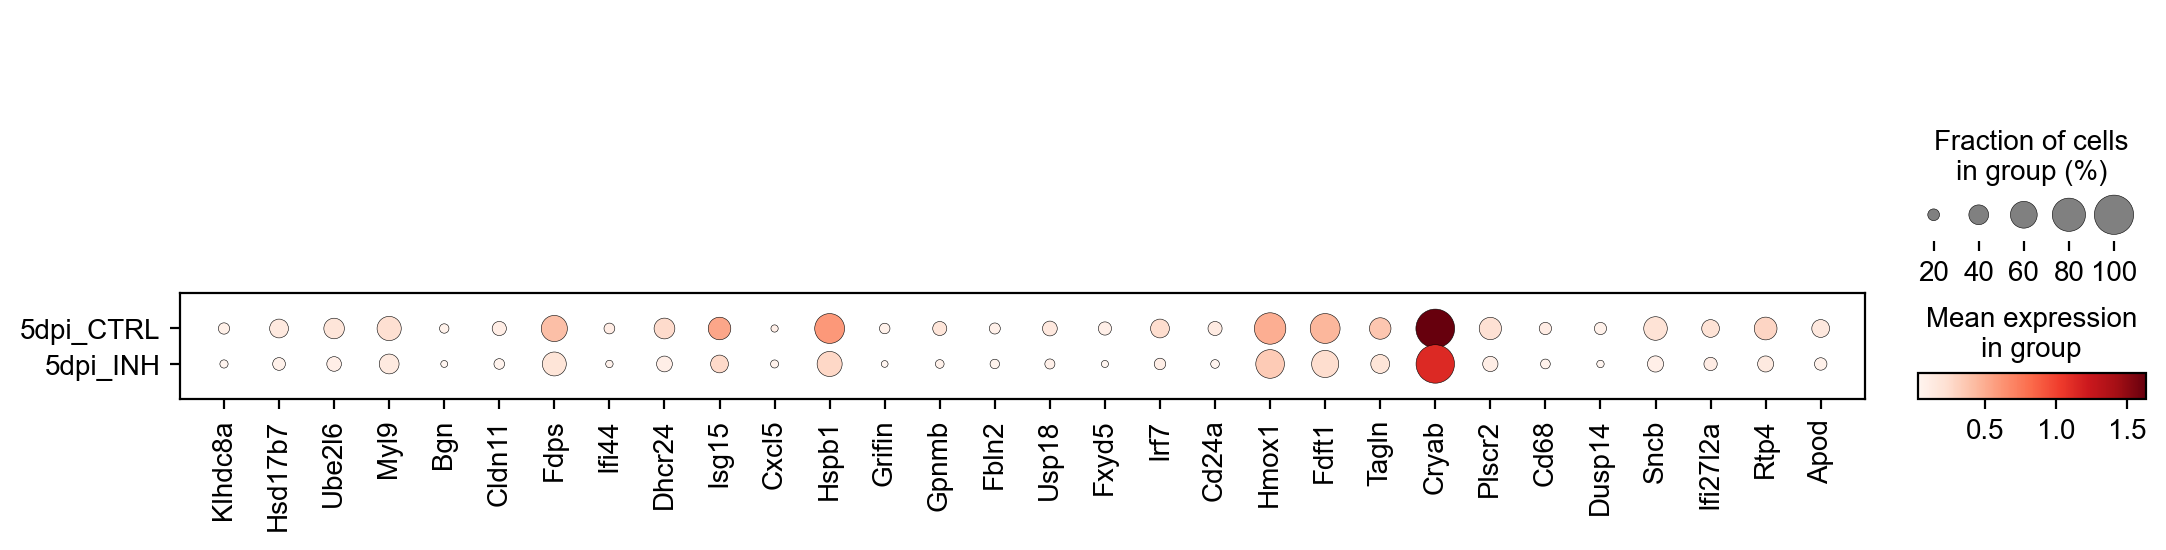

In [130]:
sc.pl.dotplot(adata_all_astros_5dpi_AG7,Astros_5dpi_CTRL_AG7['gene'].head(30) , groupby='condition',)